# Reflectance FTIR Spectra

- This Jupyter notebook provides an example workflow for processing reflectance FTIR spectra for thicknesses of olivine and glasses through PyIRoGlass. 

- The Jupyter notebook and data can be accessed here: https://github.com/SarahShi/PyIRoGlass/blob/main/docs/examples/reflectance_ftir/. 

- You need to have the PyIRoGlass PyPi package on your machine once. If you have not done this, please uncomment (remove the #) symbol and run the cell below. 

In [1]:
#!pip install PyIRoGlass

# Load Python Packages

In [2]:
# Import packages

import os
import sys
import glob
import numpy as np
import pandas as pd

import PyIRoGlass as pig

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import rc, cm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pig.__version__

# Olivine Thicknesses

The workflows for processing olivine and glass spectra are slightly different given variable refractive index and wavenumbers of applicability. We'll walk through each individually. 


In [3]:
# Change paths to direct to folder with olivine reflectance FTIR spectra

REF_PATH_OL = 'SPECTRA/OL/'
REF_FILES_OL = sorted(glob.glob(REF_PATH_OL + "*"))

REF_DFS_FILES_OL, REF_DFS_DICT_OL = pig.Load_SampleCSV(REF_FILES_OL, wn_high = 2700, wn_low = 2100)

Print the name of all files in the directory 

In [4]:
REF_DFS_FILES_OL

['AC4_OL27_REF_b', 'AC4_OL48_REF_a']

Let's look at what a dictionary of reflectance FITR spectra look like. Samples are identified by their file names and the wavenumber and absorbance data are stored for each spectrum. 

In [5]:
REF_DFS_DICT_OL

{'AC4_OL27_REF_b':             Absorbance
 Wavenumber            
 2100.189      0.911977
 2102.118      0.908623
 2104.046      0.904154
 2105.975      0.899443
 2107.903      0.895345
 ...                ...
 2692.253      0.759809
 2694.182      0.759502
 2696.111      0.759461
 2698.039      0.758946
 2699.968      0.758412
 
 [312 rows x 1 columns],
 'AC4_OL48_REF_a':             Absorbance
 Wavenumber            
 2100.189      0.858248
 2102.118      0.850497
 2104.046      0.843580
 2105.975      0.837450
 2107.903      0.833140
 ...                ...
 2692.253      0.672430
 2694.182      0.672987
 2696.111      0.673518
 2698.039      0.675356
 2699.968      0.675208
 
 [312 rows x 1 columns]}

The reflectance index is a key input for this method. In olivine, the refractive index is compositionally dependent. Deer, Howie, and Zussman parameterize this value for olivine in An introduction to the rock-forming minerals. The Reflectance_Index function performs this calculation, inputting forsterite content and returning the reflectance index. 

In [6]:
# Use DHZ parameterization of olivine reflectance index. 

n_ol = pig.Reflectance_Index(0.72)

print(n_ol)

1.7097733333333334


We're ready to use the Thickness_Process function now. We input the arguments of the dictionary of spectra, reflectance index, the wavenumber range, and booleans of baseline removal, plotting, and whether the phase is olivine. 

We use the wavenumber range of 2700-2100 cm$^{-1}$ in olivine -- see the paper for more details. We remove a baseline from the spectrum to remove variability existing in the absorbances and to allow the data to be centered around 0. This does not change amplitude. We have the phaseol boolean for specifying whether your phase is olivine or not. 

Thickness_Process function workflow is as follows: 
- Remove baseline to center the data around an absorbance of 0. 
- Apply a Savitzky-Golay filter to smooth the data for single-spikes. 
- Identify extrema.
- Calculate wavenumber differences between extrema.
- Calculate mean and $\sigma$ thickness. 

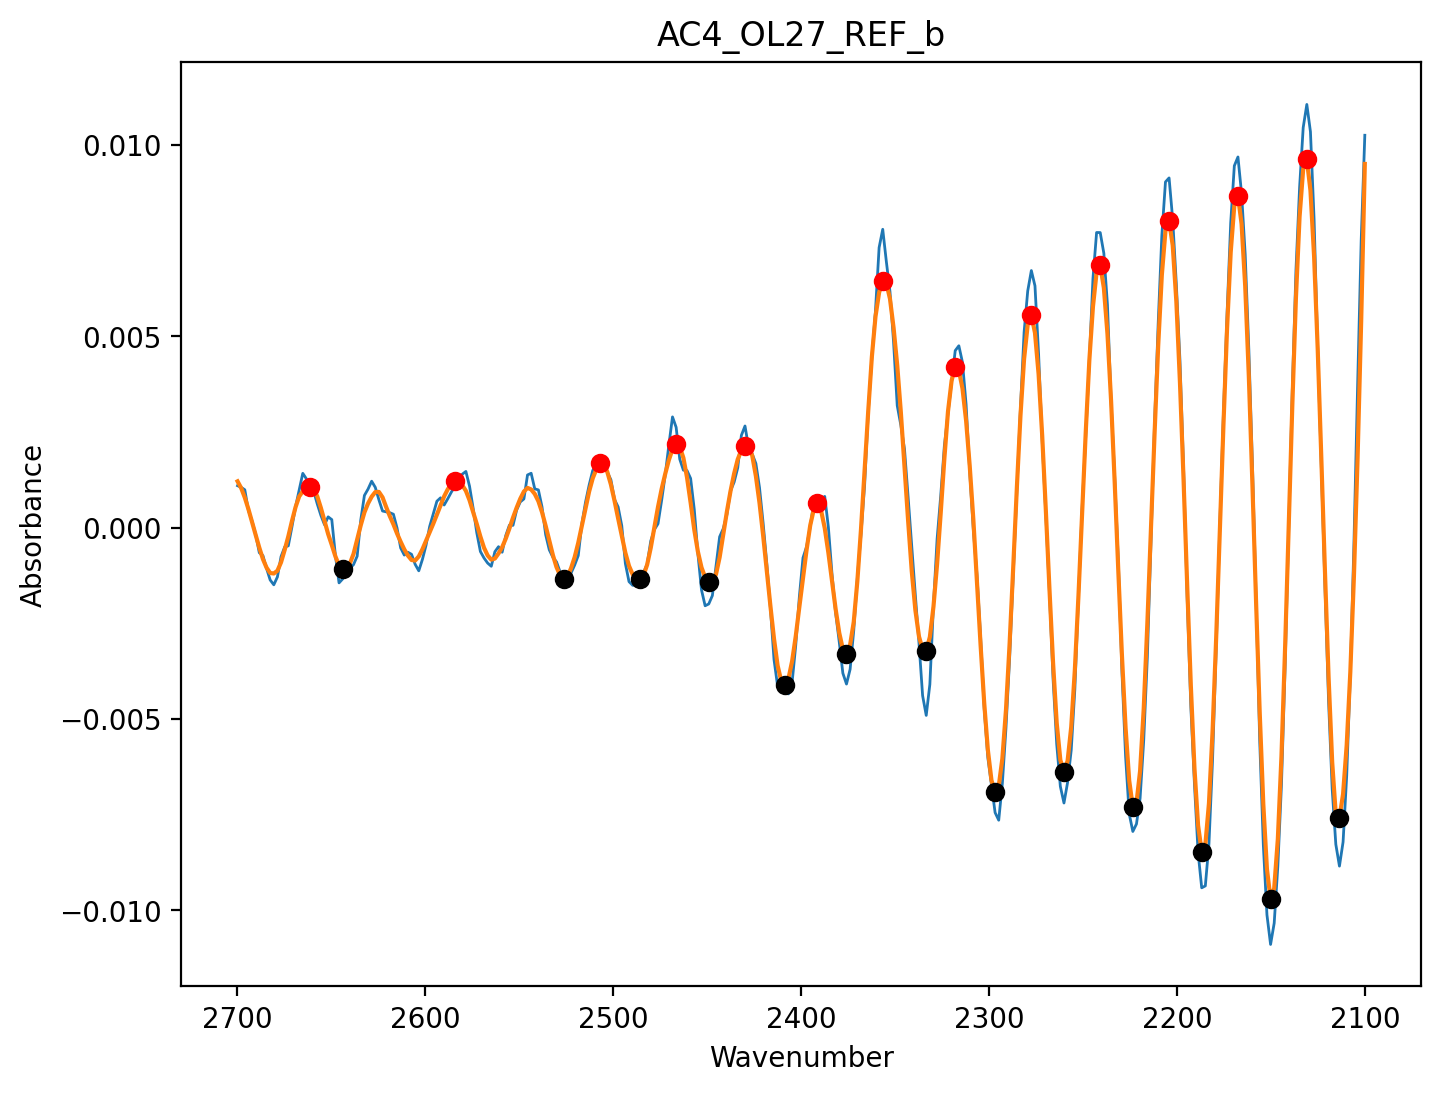

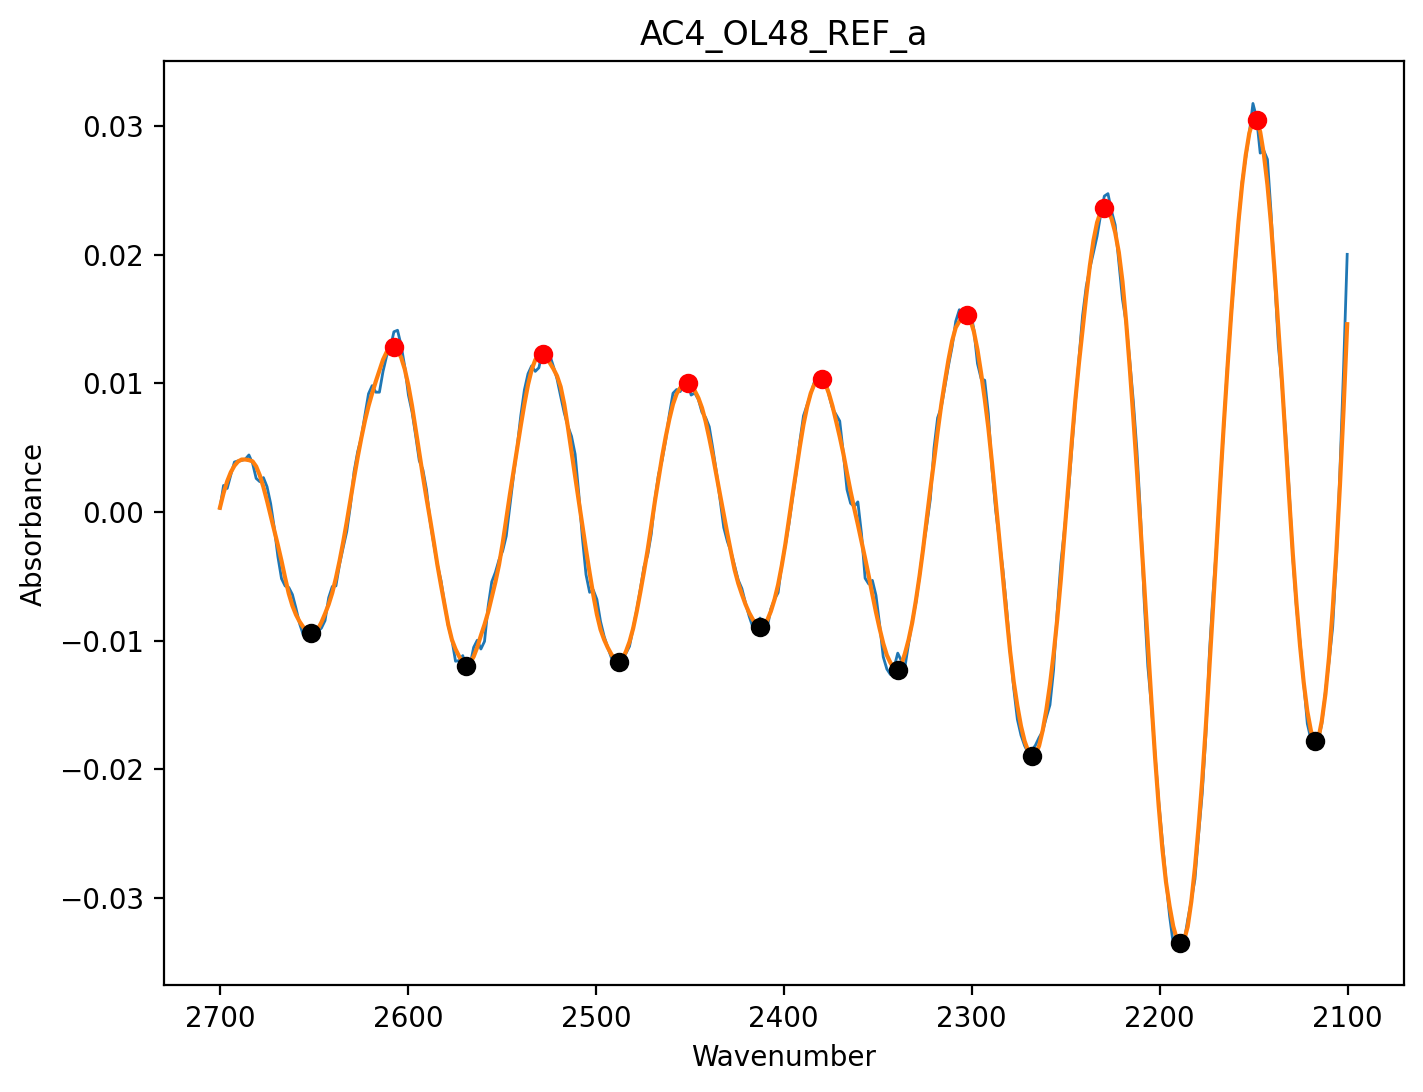

In [7]:
FUEGO_THICK = pig.Thickness_Process(REF_DFS_DICT_OL, n = n_ol, wn_high = 2700, wn_low = 2100, remove_baseline = True, plotting = True, phaseol = True)

The thickness dataframe returned quantifies mean and $\sigma$ thicknesses just from the maxima, minima, and both. We recommend using 'Thickness_M' and 'Thickness_STD', which represent the mean and $\sigma$ thickness across all extrema. 


In [8]:
FUEGO_THICK

,Peak_Thicknesses,Peak_Thickness_M,Peak_Thickness_STD,Trough_Thicknesses,Trough_Thickness_M,Trough_Thickness_STD,Thickness_M,Thickness_STD
AC4_OL27_REF_b,"[79.81, 79.81, 79.81, 79.81, 72.21, 75.82, 84....",77.93,3.63,"[79.81, 79.81, 79.81, 79.81, 79.81, 79.81, 68....",78.29,5.19,78.12,4.52
AC4_OL48_REF_a,"[39.9, 37.91, 37.91, 36.98]",38.17,1.07,"[36.98, 39.9, 38.88]",38.59,1.21,38.35,1.15


# Glass Thicknesses

Now, let's look at glass. The slight variations exist within reflectance index, wavenumbers of interest, and the phaseol boolean. We use the Nichols and Wysoczanski, 2007 reflectance index of 1.546 for basaltic glass in this example. The wavenumber range is extended to 2850-1700 cm$^{-1}$. See the paper for more details. 

I won't show all the intermediate steps, and will jump forward to the results since the workflows are identical aside from these parameters. 

,Peak_Thicknesses,Peak_Thickness_M,Peak_Thickness_STD,Trough_Thicknesses,Trough_Thickness_M,Trough_Thickness_STD,Thickness_M,Thickness_STD
ND70_02-01_30June2022_150x150_rf_sp1,"[37.27, 37.68, 35.87, 38.11, 36.46, 36.26, 37....",36.78,0.77,"[37.69, 38.11, 38.55, 36.26, 36.66, 36.26, 37....",37.22,0.78,37.01,0.8
ND70_02-01_30June2022_150x150_rf_sp2,"[37.06, 37.47, 38.33, 35.49, 34.76, 33.37, 33....",35.57,1.71,"[38.55, 37.27, 37.69, 36.86, 37.69, 38.55, 34....",37.18,1.26,36.33,1.72
ND70_02-01_30June2022_150x150_rf_sp3,"[37.9, 38.11, 38.33, 38.55, 39.69, 39.69, 39.2...",38.44,0.84,"[36.46, 37.68, 38.77, 36.26, 35.31, 37.27, 36....",36.74,1.1,37.68,1.28


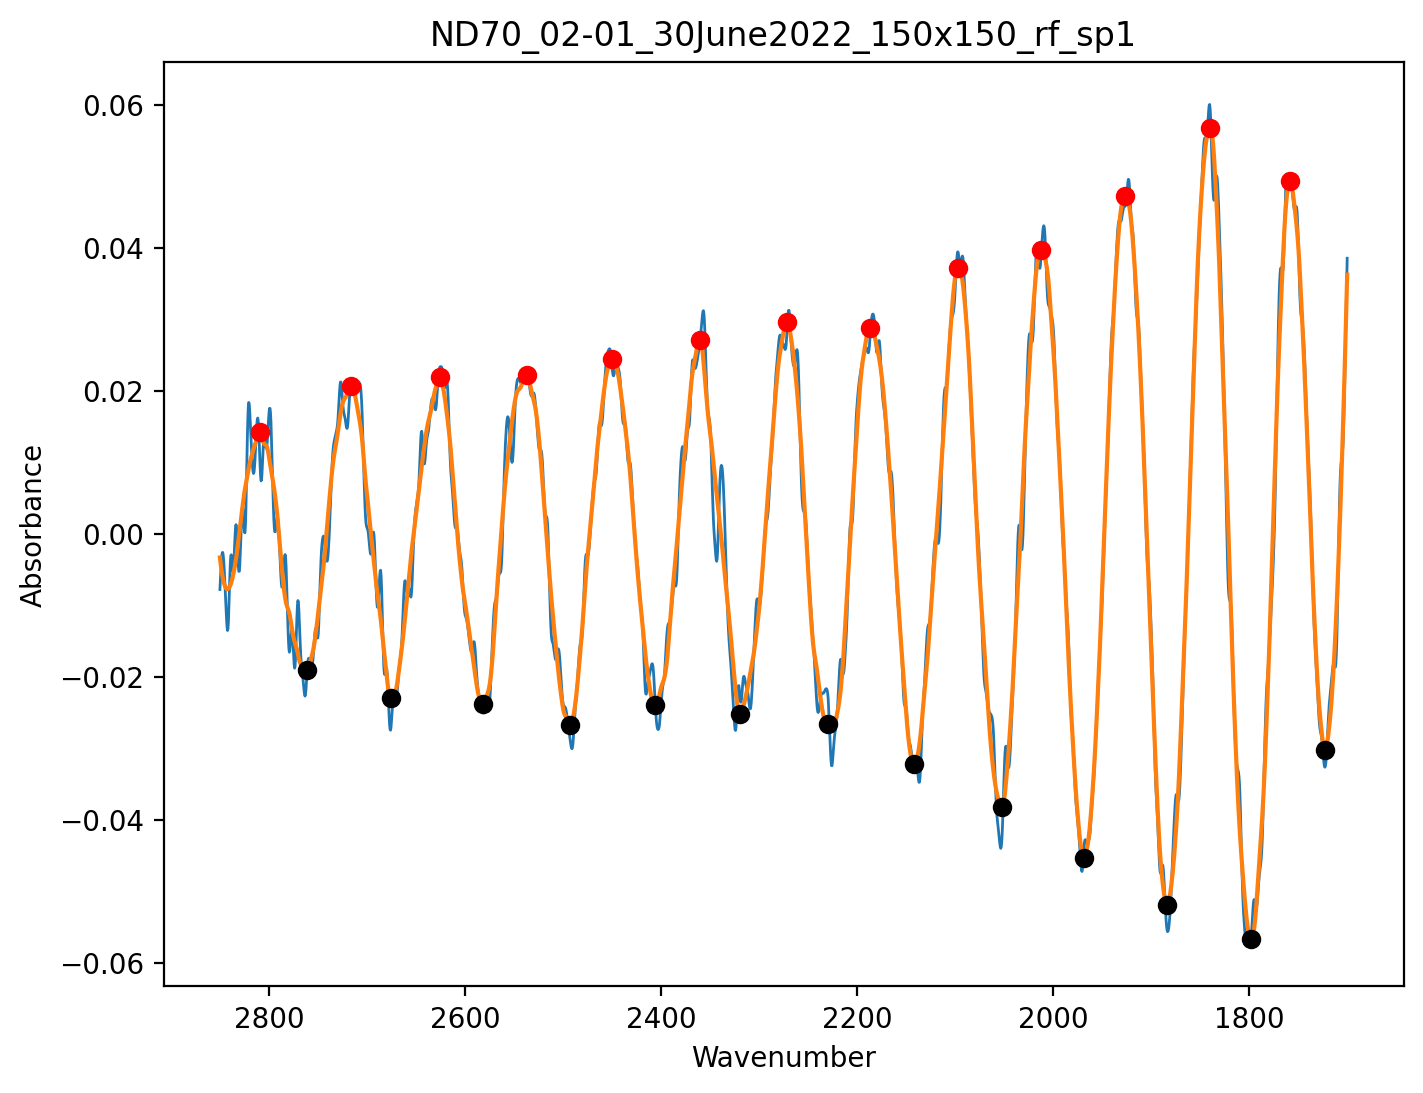

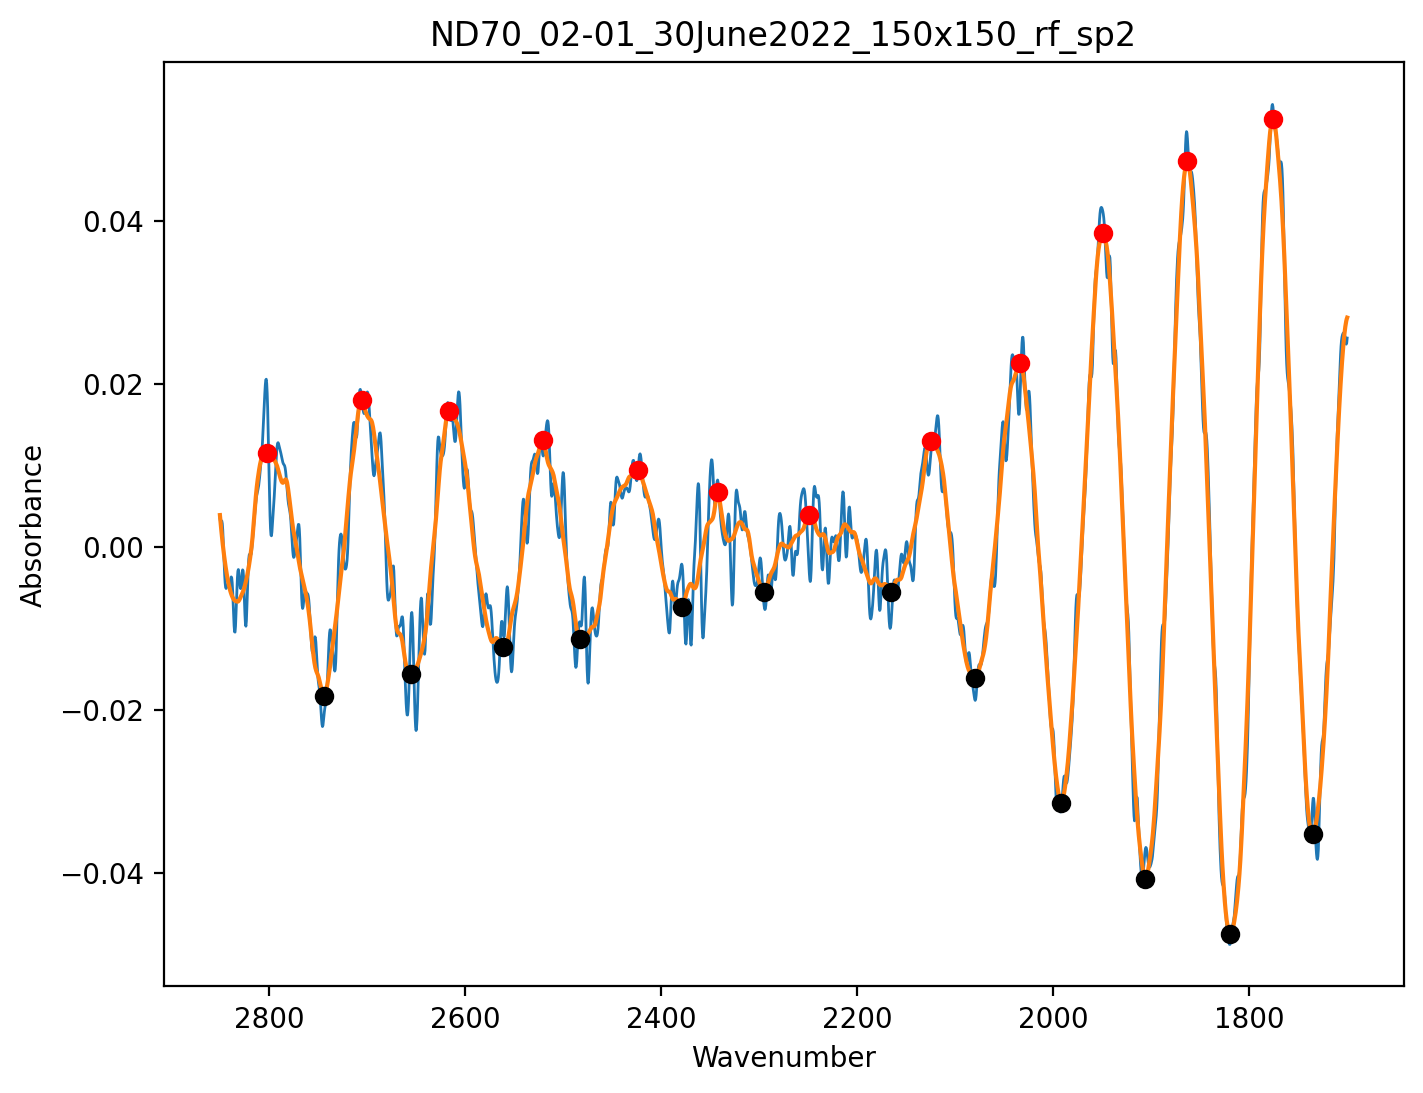

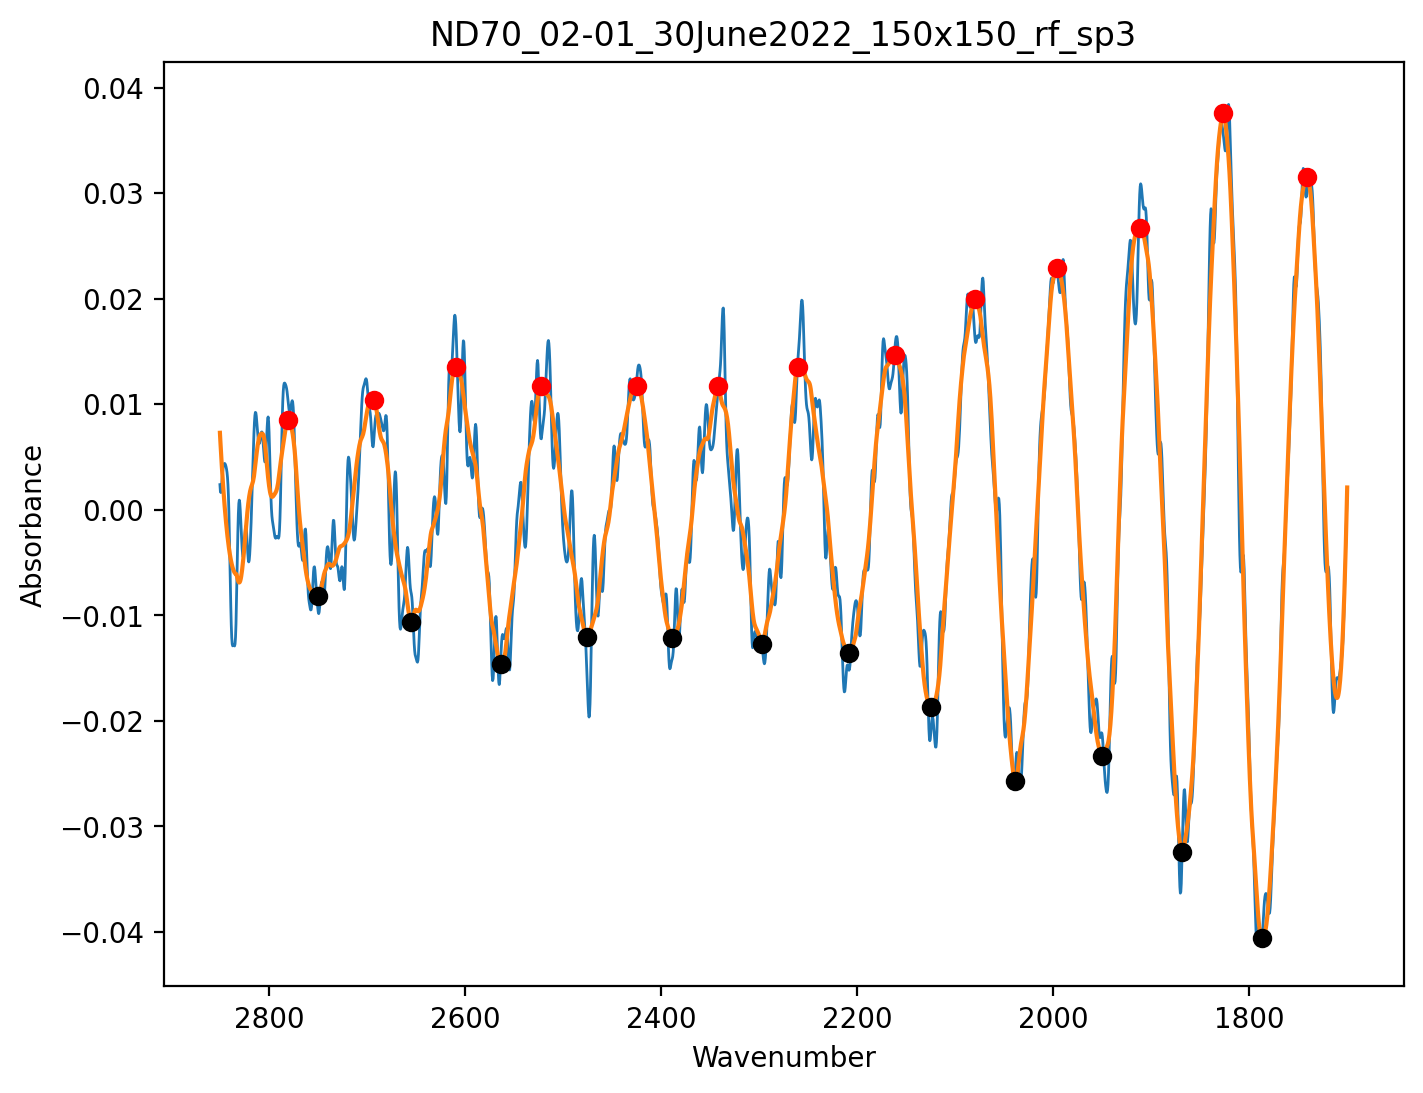

In [9]:

# Change paths to direct to folder with glass reflectance FTIR spectra


REF_PATH_GL = 'SPECTRA/GL/'
REF_FILES_GL = sorted(glob.glob(REF_PATH_GL + "*"))

REF_DFS_FILES_GL, REF_DFS_DICT_GL = pig.Load_SampleCSV(REF_FILES_GL, wn_high = 2850, wn_low = 1700)

# n=1.546 in the range of 2000-2700 cm^-1 following Nichols and Wysoczanski, 2007 for basaltic glass

n_gl = 1.546

REF_GLASS = pig.Thickness_Process(REF_DFS_DICT_GL, n = n_gl, wn_high = 2850, wn_low = 1700, remove_baseline = True, plotting = True, phaseol = False)

REF_GLASS
